In [2]:
import DataLoader
import importlib
import pandas as pd
import CoverageHelper
import seaborn as sns

%matplotlib inline
importlib.reload(DataLoader)
coverage_df = DataLoader.load_csv_coverage()
test_graph_df = DataLoader.load_csv_test_graphs()
# stat_graph_df = DataLoader.load_csv_stat_graph(False)
# stat_trans_graph_df = DataLoader.load_csv_stat_graph(True)

Number of apps: 
375


Total entries:
32270


Number of apps: 
375


Total entries:
32270


Total covered methods:
4011884


Everything is good!


Total entries:
1937


Coverage_report

In [95]:
test_graph_df.head()
test_graph_df[test_graph_df.app == "com.mcpebabyskinsv2"]

,source,target,action,widget_id,widget,strategy,app
694,com.free.skins.SplashActivity,com.startapp.android.publish.OverlayActivity,click,2.131624e+09,android.support.v7.widget.AppCompatImageView,systematic,com.mcpebabyskinsv2
695,com.free.skins.SplashActivity,com.startapp.android.publish.OverlayActivity,click,2.131624e+09,android.support.v7.widget.AppCompatEditText,systematic,com.mcpebabyskinsv2
698,com.free.skins.SplashActivity,com.startapp.android.publish.FullScreenActivity,click,2.131624e+09,android.support.v7.widget.AppCompatImageView,systematic,com.mcpebabyskinsv2
699,com.free.skins.SplashActivity,com.startapp.android.publish.FullScreenActivity,click,2.131624e+09,android.support.v7.widget.AppCompatEditText,systematic,com.mcpebabyskinsv2
704,com.free.skins.SplashActivity,com.free.skins.MainActivity,click,2.131624e+09,android.support.v7.widget.AppCompatImageView,systematic,com.mcpebabyskinsv2
705,com.free.skins.SplashActivity,com.free.skins.MainActivity,click,2.131624e+09,android.support.v7.widget.AppCompatEditText,systematic,com.mcpebabyskinsv2
710,com.free.skins.SplashActivity,com.free.skins.MainActivity,click,2.131624e+09,android.widget.GridView,systematic,com.mcpebabyskinsv2
712,com.free.skins.SplashActivity,com.startapp.android.publish.OverlayActivity,click,2.131624e+09,android.support.v7.widget.AppCompatImageView,random,com.mcpebabyskinsv2
713,com.free.skins.SplashActivity,com.startapp.android.publish.OverlayActivity,click,2.131624e+09,android.support.v7.widget.AppCompatEditText,random,com.mcpebabyskinsv2
714,com.startapp.android.publish.OverlayActivity,com.free.skins.MainActivity,click,2.131624e+09,android.support.v7.widget.AppCompatImageView,random,com.mcpebabyskinsv2


In [76]:
test_graph_df = test_graph_df.drop_duplicates()

In [77]:
test_graph_df.groupby(["strategy", "app"]).count().head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>source</th>
      <th>target</th>
      <th>action</th>
      <th>widget_id</th>
      <th>widget</th>
    </tr>
    <tr>
      <th>strategy</th>
      <th>app</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">random</th>
      <th>alex.map.maps</th>
      <td>5</td>
      <td>5</td>
      <td>5</td>
      <td>2</td>
      <td>2</td>
    </tr>
    <tr>
      <th>androidlab.carlog</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>asp.aniemo.pack6.ext</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>bestfreelivewallpapers.funny_photo_editor</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>bestfreelivewallpapers.love_photo_frames_hd</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

In [7]:
valid_test_graph = test_graph_df[(test_graph_df.source != "com.google.android.gms.ads.AdActivity") &
                                 (test_graph_df.target != "com.google.android.gms.ads.AdActivity")]
valid_test_graph.groupby(["strategy", "app"]).count().head()
# valid_test_graph.drop_duplicates().groupby(["strategy", "app"]).count().head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>source</th>
      <th>target</th>
      <th>action</th>
      <th>widget_id</th>
      <th>widget</th>
    </tr>
    <tr>
      <th>strategy</th>
      <th>app</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">random</th>
      <th>alex.map.maps</th>
      <td>1</td>
      <td>1</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>androidlab.carlog</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>asp.aniemo.pack6.ext</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>bestfreelivewallpapers.funny_photo_editor</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>bestfreelivewallpapers.love_photo_frames_hd</th>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

In [8]:
coverage_df.head()

,package,class,method,strategy,coverage_type,coverage_percentage,covered_lines,total_lines,app
0,com.azteca.unaimg,com.azteca.unaimg.FileCache,FileCache (Context): void,systematic,method,0,0,1,com.azteca.live
1,com.azteca.unaimg,com.azteca.unaimg.FileCache,FileCache (Context): void,systematic,block,0,0,27,com.azteca.live
2,com.azteca.unaimg,com.azteca.unaimg.FileCache,clear (): void,systematic,method,0,0,1,com.azteca.live
3,com.azteca.unaimg,com.azteca.unaimg.FileCache,clear (): void,systematic,block,0,0,25,com.azteca.live
4,com.azteca.unaimg,com.azteca.unaimg.FileCache,getFile (String): File,systematic,method,0,0,1,com.azteca.live


In [9]:
coverage_per_app = coverage_df[(coverage_df.coverage_type == "block")].groupby(["strategy", "app"]).apply(
    lambda x: x.coverage_percentage.sum() / x.coverage_percentage.count())


In [10]:
valid_test_graph[['strategy', 'app']].groupby(['strategy']).nunique()

,strategy,app
strategy,,
random,1,357
systematic,1,375


In [11]:
coverage_per_app.groupby(['strategy']).nunique()

strategy
random        357
systematic    352
dtype: int64

In [13]:
coverage_df[['strategy', 'app']].groupby(['strategy']).nunique()

,strategy,app
strategy,,
random,1,375
systematic,1,375


In [14]:

coverage_with_test_graph = valid_test_graph.groupby(["strategy", "app"]).count().join(coverage_per_app.to_frame(name='coverage')).reset_index()
# coverage_per_app.head()
coverage_with_test_graph.head()

,strategy,app,source,target,action,widget_id,widget,coverage
0,random,alex.map.maps,1,1,1,0,0,49.414634
1,random,androidlab.carlog,1,0,0,0,0,16.227692
2,random,asp.aniemo.pack6.ext,1,0,0,0,0,23.062500
3,random,bestfreelivewallpapers.funny_photo_editor,1,0,0,0,0,5.913550
4,random,bestfreelivewallpapers.love_photo_frames_hd,1,0,0,0,0,6.236405


In [15]:
coverage_with_test_graph[(coverage_with_test_graph.app == "bth.studio.quickcharge")]


,strategy,app,source,target,action,widget_id,widget,coverage
9,random,bth.studio.quickcharge,21,21,21,20,20,35.543103
367,systematic,bth.studio.quickcharge,5,5,5,5,5,33.755172


In [16]:
temp = coverage_per_app.to_frame().reset_index()
temp[(temp.app == "bth.studio.quickcharge")]


,strategy,app,0
10,random,bth.studio.quickcharge,35.543103
385,systematic,bth.studio.quickcharge,33.755172


In [17]:
valid_test_graph[(valid_test_graph.app == "bth.studio.quickcharge")].groupby(["strategy", "app"]).count()

,,source,target,action,widget_id,widget
strategy,app,,,,,
random,bth.studio.quickcharge,21,21,21,20,20
systematic,bth.studio.quickcharge,5,5,5,5,5


In [18]:
random_coverage_with_test_graph = coverage_with_test_graph[(coverage_with_test_graph.strategy == "random")].drop('strategy', 1).set_index('app')
systematic_coverage_with_test_graph = coverage_with_test_graph[(coverage_with_test_graph.strategy == "systematic")].drop('strategy', 1).set_index('app')

diff_in_coverage_per_app = random_coverage_with_test_graph['coverage'] - systematic_coverage_with_test_graph['coverage']
diff_in_coverage_per_app.to_frame().head()



,coverage
app,
alex.map.maps,27.463415
androidlab.carlog,-1.738462
asp.aniemo.pack6.ext,0.000000
bestfreelivewallpapers.funny_photo_editor,2.054881
bestfreelivewallpapers.love_photo_frames_hd,0.000000


,edges_random,edges_systematic
count,357.000000,357.000000
mean,2.428571,1.490196
std,3.624754,2.335134
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,4.000000,2.000000
max,26.000000,14.000000


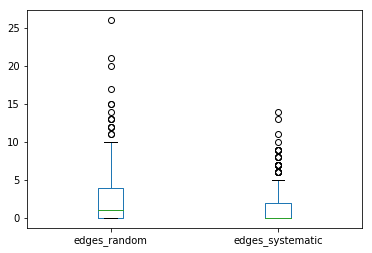

In [19]:
ditiss = pd.DataFrame()
ditiss['edges_random'] = random_coverage_with_test_graph['target']
ditiss['edges_systematic'] = systematic_coverage_with_test_graph['target']
# ditis.columns = ['edges_random']
ditiss.plot.box()
ditiss.describe()

In [20]:
diff_in_graph_per_app = random_coverage_with_test_graph['target'] - systematic_coverage_with_test_graph['target']
diff_in_graph_per_app = diff_in_graph_per_app.to_frame("edges")
diff_in_graph_per_app.head()

,edges
app,
alex.map.maps,0.0
androidlab.carlog,0.0
asp.aniemo.pack6.ext,0.0
bestfreelivewallpapers.funny_photo_editor,0.0
bestfreelivewallpapers.love_photo_frames_hd,0.0


In [21]:
diff_result = pd.concat([diff_in_graph_per_app, diff_in_coverage_per_app], axis=1, sort=False)
diff_result.head()

,edges,coverage
app,,
alex.map.maps,0.0,27.463415
androidlab.carlog,0.0,-1.738462
asp.aniemo.pack6.ext,0.0,0.000000
bestfreelivewallpapers.funny_photo_editor,0.0,2.054881
bestfreelivewallpapers.love_photo_frames_hd,0.0,0.000000


C:\Master\Thesis\IncubatorDataAnalyser\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


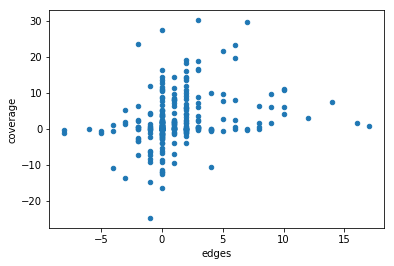

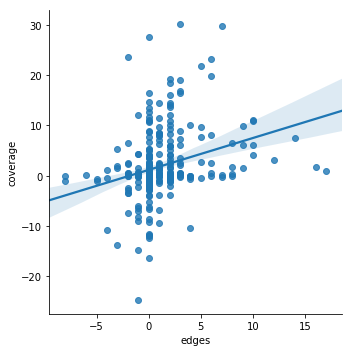

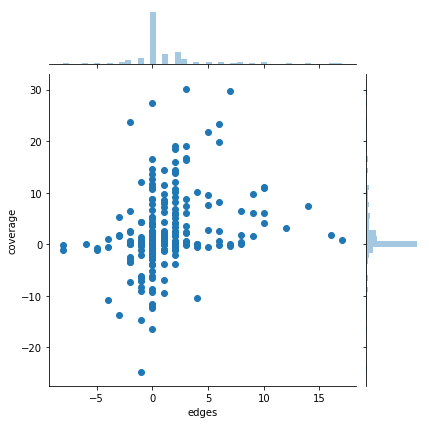

In [22]:
diff_result.plot.scatter(x='edges', y='coverage')
sns.lmplot(x='edges', y='coverage', data=diff_result, fit_reg=True)
sns.jointplot(x=diff_result.edges, y=diff_result.coverage, kind="scatter")

In [23]:
diff_result.edges.describe()

count    357.000000
mean       0.938375
std        2.803812
min       -8.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       17.000000
Name: edges, dtype: float64

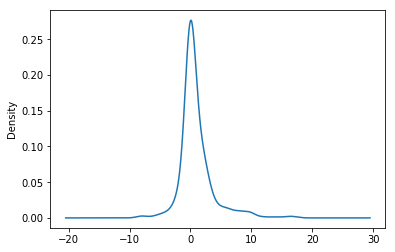

In [24]:
diff_result.edges.plot.kde()

In [25]:
random_coverage_with_test_graph.head()

,source,target,action,widget_id,widget,coverage
app,,,,,,
alex.map.maps,1,1,1,0,0,49.414634
androidlab.carlog,1,0,0,0,0,16.227692
asp.aniemo.pack6.ext,1,0,0,0,0,23.062500
bestfreelivewallpapers.funny_photo_editor,1,0,0,0,0,5.913550
bestfreelivewallpapers.love_photo_frames_hd,1,0,0,0,0,6.236405


In [26]:
systematic_coverage_with_test_graph.head()

,source,target,action,widget_id,widget,coverage
app,,,,,,
alex.map.maps,1,1,1,1,1,21.951220
androidlab.carlog,1,0,0,0,0,17.966154
asp.aniemo.pack6.ext,1,0,0,0,0,23.062500
bestfreelivewallpapers.funny_photo_editor,1,0,0,0,0,3.858669
bestfreelivewallpapers.love_photo_frames_hd,1,0,0,0,0,6.236405


In [27]:
# test = pd.DataFrame({'strategy': ["random", "random", "systematic", "systematic", "systematic", "random"],
#                      'app': ["app1", "app1", "app2", "app2", "app2", "app3"],
#                      'source': ["test", "train", "test", "train", "train", "train"],
#                      'target': ["test", "test", "test", "train", "hoi", "pop"]})

# t = test.groupby(['strategy', 'app']).stack()

number_of_unique_screens_per_app = valid_test_graph[['strategy', 'app', 'source', 'target']].melt(
    id_vars=['strategy', 'app'])

number_of_unique_screens_per_app.head()

,strategy,app,variable,value
0,systematic,com.azteca.live,source,com.azteca.live.MainActivity
1,random,com.azteca.live,source,com.azteca.live.MainActivity
2,random,com.azteca.live,source,com.azteca.live.Contenido
3,systematic,com.thalia.pink.glitter.keyboard,source,com.tsua.keyboard.template.activities.Main
4,random,com.thalia.pink.glitter.keyboard,source,com.tsua.keyboard.template.activities.Main


In [28]:
ran_n = number_of_unique_screens_per_app[(number_of_unique_screens_per_app.strategy == 'random')].drop(['strategy'],
                                                                                                       axis=1)
sys_n = number_of_unique_screens_per_app[(number_of_unique_screens_per_app.strategy == 'systematic')].drop(['strategy'],
                                                                                                           axis=1)


In [29]:
ran_n.groupby(['app']).value.nunique()

app
alex.map.maps                                        2
androidlab.carlog                                    1
asp.aniemo.pack6.ext                                 1
bestfreelivewallpapers.funny_photo_editor            1
bestfreelivewallpapers.love_photo_frames_hd          1
biz.andxor.hearingaid                                1
br.com.blackmountain.mylook                          3
br.org.altitudesl                                    1
brdata.cms.base.foodbazaar                           3
bth.studio.quickcharge                               8
carrioncastillo.invitaciones.happy                   4
church.itvessel.com.tarm                             1
co.appzone.www.eye_makeup                            1
co.instavr.iostest                                   1
co.mobius.vrcinema                                   2
coloring.book.color                                  1
com.BillDirkes.QuickEM                               2
com.CarsLiveWallpaperHQ                              2
com.Fe

In [30]:
sys_n.groupby(['app']).value.nunique()

app
alex.map.maps                                        2
androidlab.carlog                                    1
asp.aniemo.pack6.ext                                 1
bestfreelivewallpapers.funny_photo_editor            1
bestfreelivewallpapers.love_photo_frames_hd          1
biz.andxor.hearingaid                                1
br.com.blackmountain.mylook                          2
br.com.geochenapps.tonguetwister                     1
br.org.altitudesl                                    1
brdata.cms.base.foodbazaar                           4
bth.studio.quickcharge                               5
carrioncastillo.invitaciones.happy                   4
church.itvessel.com.tarm                             1
co.appzone.www.eye_makeup                            1
co.instavr.iostest                                   1
co.mobius.vrcinema                                   2
coloring.book.color                                  1
com.BillDirkes.QuickEM                               2
com.Ca

,screens_random,screens_systematic
count,357.000000,357.000000
mean,2.198880,1.739496
std,1.479143,0.937324
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,1.000000
75%,3.000000,2.000000
max,8.000000,6.000000


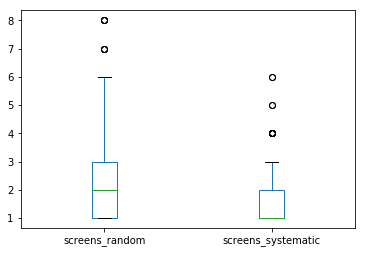

In [31]:
pl = pd.DataFrame()
pl["screens_random"] = ran_n.groupby(['app']).value.nunique()
pl["screens_systematic"] = sys_n.groupby(['app']).value.nunique()

pl.plot.box()
pl.describe()


In [32]:
diff_in_unique_screens = ran_n.groupby(['app']).value.nunique() - sys_n.groupby(['app']).value.nunique()
diff_in_unique_screens.head()

app
alex.map.maps                                  0.0
androidlab.carlog                              0.0
asp.aniemo.pack6.ext                           0.0
bestfreelivewallpapers.funny_photo_editor      0.0
bestfreelivewallpapers.love_photo_frames_hd    0.0
Name: value, dtype: float64

In [33]:
diff_result = pd.concat([diff_in_unique_screens.to_frame("screens"), diff_in_coverage_per_app.to_frame()], axis=1, sort=False)
diff_result.head()


,screens,coverage
app,,
alex.map.maps,0.0,27.463415
androidlab.carlog,0.0,-1.738462
asp.aniemo.pack6.ext,0.0,0.000000
bestfreelivewallpapers.funny_photo_editor,0.0,2.054881
bestfreelivewallpapers.love_photo_frames_hd,0.0,0.000000


C:\Master\Thesis\IncubatorDataAnalyser\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


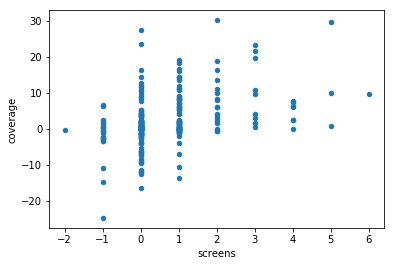

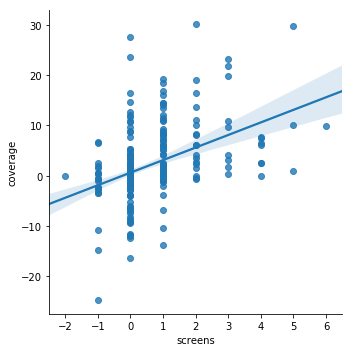

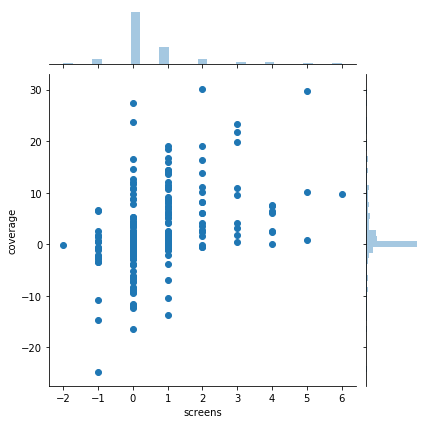

In [34]:
diff_result.plot.scatter(x='screens', y='coverage')
sns.lmplot(x='screens', y='coverage', data=diff_result, fit_reg=True)
sns.jointplot(x=diff_result.screens, y=diff_result.coverage, kind="scatter")

In [35]:
diff_result.screens.describe()

count    357.000000
mean       0.459384
std        1.058222
min       -2.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        6.000000
Name: screens, dtype: float64

In [3]:
stat_trans_act_graph_df = DataLoader.load_csv_stat_graph("-act-transitive")

Total entries:
32270


In [45]:
# total_screens_stat =
number_of_unique_screens_per_app_stat = stat_trans_act_graph_df[['app', 'source', 'target']].melt(
    id_vars=['app'])

number_of_unique_screens_per_app_stat.head()

,app,variable,value
0,com.azteca.live,source,com.azteca.live.PageFragment
1,com.azteca.live,source,com.azteca.live.Video2Cortinilla
2,com.azteca.live,source,com.azteca.live.VideoCortinilla
3,com.azteca.live,source,com.azteca.live.MainActivity
4,com.azteca.live,source,com.azteca.live.MainActivity


In [63]:
number_of_unique_screens_per_app_stat.groupby("app").value.count().head()

app
alex.map.maps                                   2
bestfreelivewallpapers.funny_photo_editor      68
bestfreelivewallpapers.love_photo_frames_hd    34
br.com.blackmountain.mylook                    70
br.com.geochenapps.tonguetwister                2
Name: value, dtype: int64

In [82]:
random_unique_screens_found_percentage = pd.DataFrame()
random_unique_screens_found_percentage['diff_screens'] = ran_n.groupby(['app']).value.nunique() / number_of_unique_screens_per_app_stat.groupby("app").value.count() * 100
random_unique_screens_found_percentage.head()
random_unique_screens_found_percentage.sort_values(by="diff_screens", ascending=False)
# com.snaptattooadder
# com.mcpepixelmonskins
# com.mcpebabyskinsv2
# com.emojifamily.emoji.keyboard.symbol.cutesymbol	

,diff_screens
app,
com.snaptattooadder,250.0
com.mcpepixelmonskins,150.0
com.mcpebabyskinsv2,150.0
com.emojifamily.emoji.keyboard.symbol.cutesymbol,150.0
alex.map.maps,100.0
com.andpercent.apps.digitalwatch,100.0
com.trentapps.cel,100.0
com.tracker.gpstrackernew,100.0
com.tpas.vampire.yourself.camera.editor,100.0


In [62]:
systematic_unique_screens_found_percentage = sys_n.groupby(['app']).value.nunique() / number_of_unique_screens_per_app_stat.groupby("app").value.count() * 100
systematic_unique_screens_found_percentage.head()

app
alex.map.maps                                  100.000000
androidlab.carlog                                     NaN
asp.aniemo.pack6.ext                                  NaN
bestfreelivewallpapers.funny_photo_editor        1.470588
bestfreelivewallpapers.love_photo_frames_hd      2.941176
Name: value, dtype: float64

,diff_screens,diff_coverage
diff_screens,1.000000,0.399564
diff_coverage,0.399564,1.000000


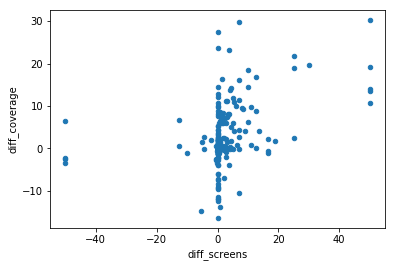

In [60]:
loll = pd.DataFrame()
loll['diff_screens'] = random_unique_screens_found_percentage - systematic_unique_screens_found_percentage
loll['diff_coverage'] = diff_in_coverage_per_app
loll.dropna().plot.scatter(x="diff_screens", y="diff_coverage")
loll.dropna().corr()

In [79]:
random_edges_percentage = pd.DataFrame()
random_edges_percentage['diff_edges'] = random_coverage_with_test_graph['target'] / stat_trans_act_graph_df.groupby("app").count()["target"] *100
# random_edges_percentage.sort_values(by="target")
random_edges_percentage.dropna().sort_values(by="diff_edges", ascending=False)
# random_coverage_with_test_graph

,diff_edges
app,
com.snaptattooadder,500.000000
com.mcpebabyskinsv2,500.000000
com.mcpepixelmonskins,500.000000
com.emojifamily.emoji.keyboard.symbol.cutesymbol,400.000000
bth.studio.quickcharge,262.500000
com.vadevteam.thandongdatviet,225.000000
com.dancingpixelstudios.sixaxiscompatibilitychecker,200.000000
com.idearidge.doublecouponchecker,200.000000
com.istudio.flashnotification,200.000000


In [89]:
random_coverage_with_test_graph.loc[["com.snaptattooadder"]]
stat_trans_act_graph_df.groupby("app").loc[["com.snaptattooadder"]]

KeyError: "None of [['com.snaptattooadder']] are in the [index]"